<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="200" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="600" height="150" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="text-align: center;"><img src="https://i.ibb.co/XS0bxSH/best-bootcamps.png" width="400" height="130" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

# WELCOME!

For given to you ham-spam data, you are asked to perform text classification.

1-Perform EDA on the data.

2-Apply data cleaning operations.

3-Visualize important tokens of ham and spam messages in the data using wordcloud.

4-Get scores from ML, DL, BERT,  pre-trained model from Huggingface and compare them and interpret the results.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install contractions
!pip install autocorrect
!pip install nltk
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=3da9c8ed4995dab9652ab62f2a0802eab3b06f0a4738e008499ef2f30af1fb6d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import contractions
import re

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (12,5)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
# df = pd.read_csv('spam.csv', encoding='latin-1')
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [11]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [12]:
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)

In [13]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

,0
label,0
message,0


In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df['message_len'] = df['message'].apply(lambda x: len(x.split(' ')))
df.head()

,label,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [19]:
df["label"].value_counts()

,count
label,
ham,4516
spam,653


In [20]:
df["label"].value_counts(normalize=True)

,proportion
label,
ham,0.87367
spam,0.12633


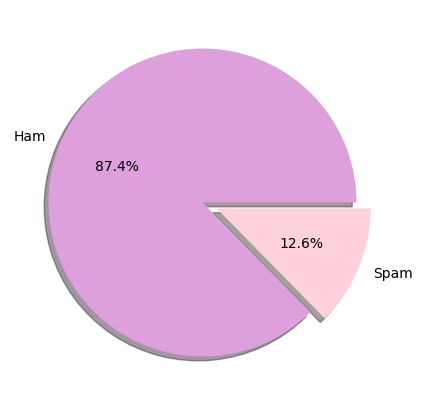

In [21]:
df["label"].value_counts().plot(kind="pie", shadow=True, explode=(0,0.1), autopct='%1.1f%%', labels=["Ham","Spam"], colors=['#DDA0DD', '#FFD1DC'])
plt.ylabel("")
plt.show()

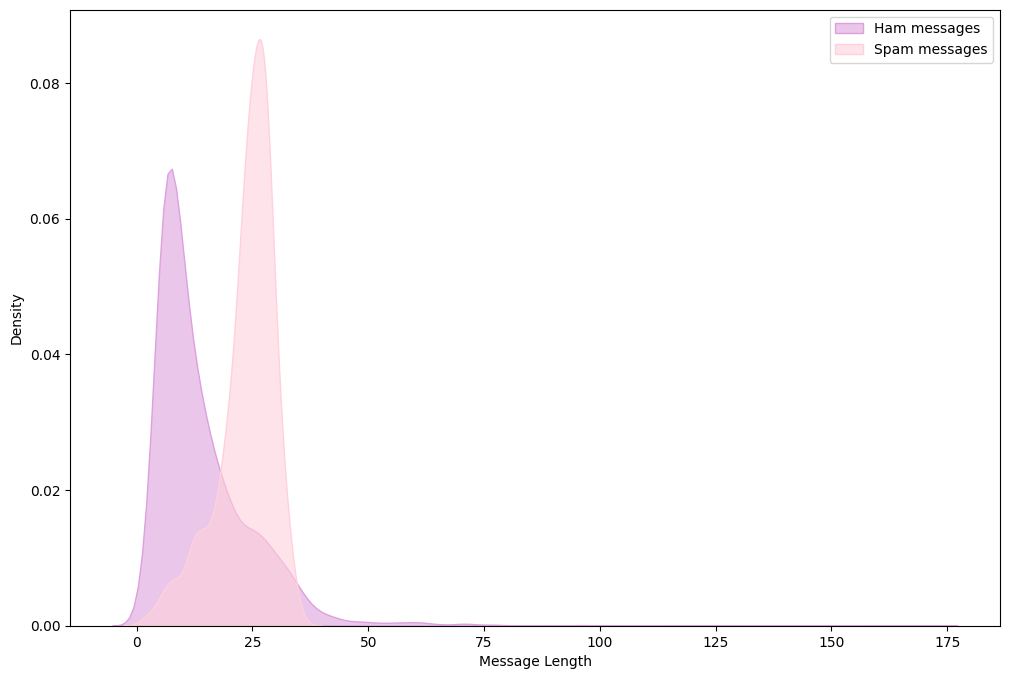

In [22]:
plt.figure(figsize=(12, 8))

# KDE plot for 'ham' messages
sns.kdeplot(df[df["label"] == 'ham'].message_len,
            color='#DDA0DD',
            label='Ham messages',
            fill=True, alpha=0.6)

# KDE plot for 'spam' messages
sns.kdeplot(df[df['label'] == 'spam'].message_len,
            color='#FFD1DC',
            label='Spam messages',
            fill=True, alpha=0.6)

plt.legend()
plt.xlabel("Message Length")
plt.show()

### Data Cleaning

In [23]:
stop_words = stopwords.words("english")

for i in ["not", "no"]:
  stop_words.remove(i)

In [24]:
def cleaning(data):
    import contractions
    from autocorrect import Speller
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer


    #1.Correction of text
    data = re.sub('\[.*?\]', '', data).strip()        # removes text in square brackets
    data = re.sub('<.*?>+', '', data).strip()         # removes HTML tags
    data = re.sub('\w*\d\w*', '', data).strip()       # removes words that contain digits
    data = re.sub('http\S*', '', data).strip()        # removes links
    data = re.sub('www\S*', '', data).strip()         # removes links

    # 2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    # 3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4.Contraction of text
    contraction_data=contractions.fix(data)

    #5. Tokenize and lower
    text_tokens = word_tokenize(contraction_data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #9. joining
    return " ".join(text_cleaned)

In [25]:
clean_df = pd.DataFrame({
    'label': df['label'],
    'message': df['message'].apply(cleaning)
})

In [26]:
clean_df.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,dun say early hor c already say
4,ham,nah not think go usf life around though


### Worldclouds

#### Detect Labels (Ham and Spam Messages separately)

In [27]:
ham= clean_df[clean_df["label"]=="ham"]["message"]
ham

,message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif oni
3,dun say early hor c already say
4,nah not think go usf life around though
6,even brother not like speak treat like aid patent
...,...
5565,huh lei
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like would interested buyin...


In [28]:
spam = clean_df[clean_df["label"]=="spam"]["message"]
spam

,message
2,free entry wkly comp win fa cup final tkts may...
5,freemsg hey darling week no word back would li...
8,winner valued network customer selected receiv...
9,mobile month r entitled update latest colour m...
11,six chance win cash pound txt send cost tsandc...
...,...
5537,want explicit sex sec ring cost gsex pobox
5540,asked chatlines inclu free min india cust serv...
5547,contract mobile mnths latest motorola nokia et...
5566,reminder get pound free call credit detail gre...


In [29]:
ham_words = " ".join(ham)
spam_words = " ".join(spam)

### Create worldcloud (ham and spam separately)

In [30]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.4 MB/s eta 0:00:00


In [31]:
from wordcloud import WordCloud

In [32]:
worldcloud_ham = WordCloud(background_color="white", max_words =250)

# creates an image of the top 250 most frequently mentioned tokens in the corpus with a white background color

In [33]:
worldcloud_ham.generate(ham_words)

# With the generate command, the first 250 most frequently mentioned tokens in our data are determined according to the instructions we have given above

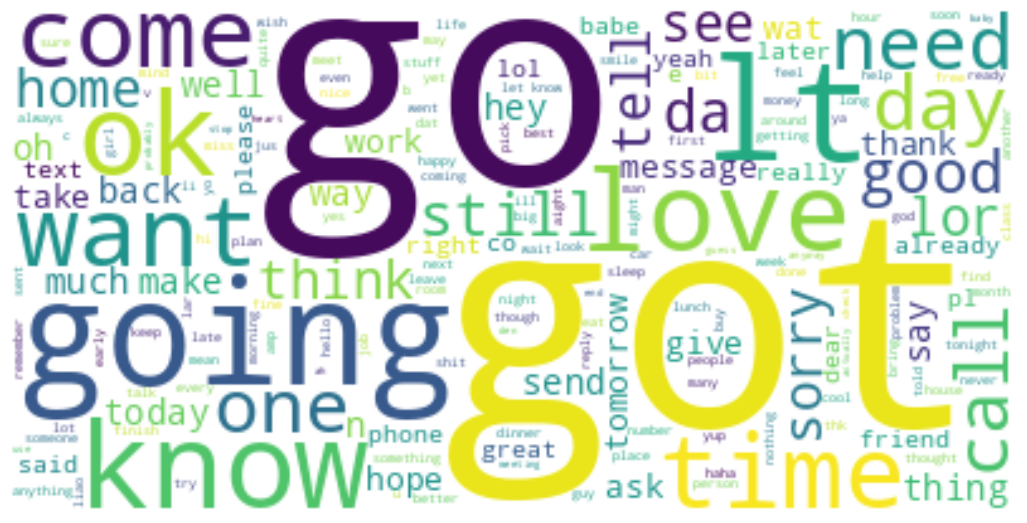

In [34]:
plt.figure(figsize = (13,13))                            # matplotlib library is used for visualization.
plt.imshow(worldcloud_ham, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
worldcloud_spam = WordCloud(background_color="white", max_words =250)

# creates an image of the top 250 most frequently mentioned tokens in the corpus with a white background color

In [36]:
worldcloud_spam.generate(spam_words)

# With the generate command, the first 250 most frequently mentioned tokens in our data are determined according to the instructions we have given above

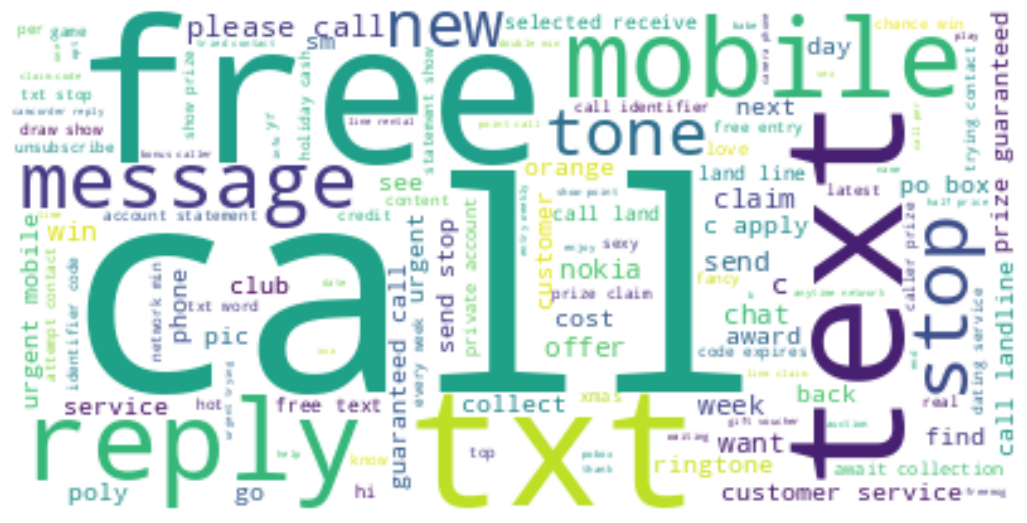

In [37]:
plt.figure(figsize = (13,13))                    # matplotlib library is used for visualization
plt.imshow(worldcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Classification with Machine Learning and Deep Learning

### Train-test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# convert label to a numerical variable
clean_df['label'] = clean_df["label"].map({'ham':0, 'spam':1})

In [40]:
X = clean_df["message"]
y = clean_df["label"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=101)

### Count Vectorization

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vectorizer = CountVectorizer(min_df=3)   # min_df = 3 --> ignore tokens that occur in less than 3 documents (comments) in my corpus.
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# By giving the cleaning function we defined above to the preprocessor hyper-parameter,
# we can perform the cleaning operation within the CountVectorizer transformation algorithm.

In [44]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
pd.DataFrame(X_train_count.toarray(),
             columns=vectorizer.get_feature_names_out())

,abiola,able,abta,ac,acc,accept,access,accident,accidentally,account,ache,across,action,activate,actually,ad,add,addie,address,admirer,adore,adult,advance,advice,affair,...,ya,yahoo,yan,yar,yay,yeah,year,yep,yes,yest,yesterday,yet,yetunde,yijue,ym,yo,yoga,yogasana,yor,yr,yun,yup,zed,åð,ìï
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tf_idf_vectorizer = TfidfVectorizer(min_df=3)  # min_df = 3 --> ignore tokens that occur in less than 3 documents (comments) in my corpus.
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# by giving the preprocessor hyper-parameter the cleaning function we defined above,
# we can perform the cleaning operation within the TfidfVectorizer transformation algorithm.

In [48]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,abiola,able,abta,ac,acc,accept,access,accident,accidentally,account,ache,across,action,activate,actually,ad,add,addie,address,admirer,adore,adult,advance,advice,affair,...,ya,yahoo,yan,yar,yay,yeah,year,yep,yes,yest,yesterday,yet,yetunde,yijue,ym,yo,yoga,yogasana,yor,yr,yun,yup,zed,åð,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Functions

In [50]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [51]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### Pipeline for Logistic Regression

#### Countvectorizer

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [53]:
pipeline_log_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),                                                  # 1.step : CountVectorizer
    ('classifier', LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000))        # 2.step : Logistic Regression
])

In [54]:
pipeline_log_count.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=3)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000))])

In [55]:
eval(pipeline_log_count, X_train, X_test)

[[890  13]
 [ 12 119]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.90      0.91      0.90       131

    accuracy                           0.98      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3613
           1       0.91      0.93      0.92       522

    accuracy                           0.98      4135
   macro avg       0.95      0.96      0.95      4135
weighted avg       0.98      0.98      0.98      4135



In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, average_precision_score

scores = cross_validate(pipeline_log_count, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.891381
train_precision,0.910030
test_recall,0.865856
train_recall,0.927841
test_f1,0.878311
train_f1,0.918846
test_accuracy,0.969767
train_accuracy,0.979309


In [57]:
!pip install -q mljar-scikit-plot

  Preparing metadata (setup.py) ... done


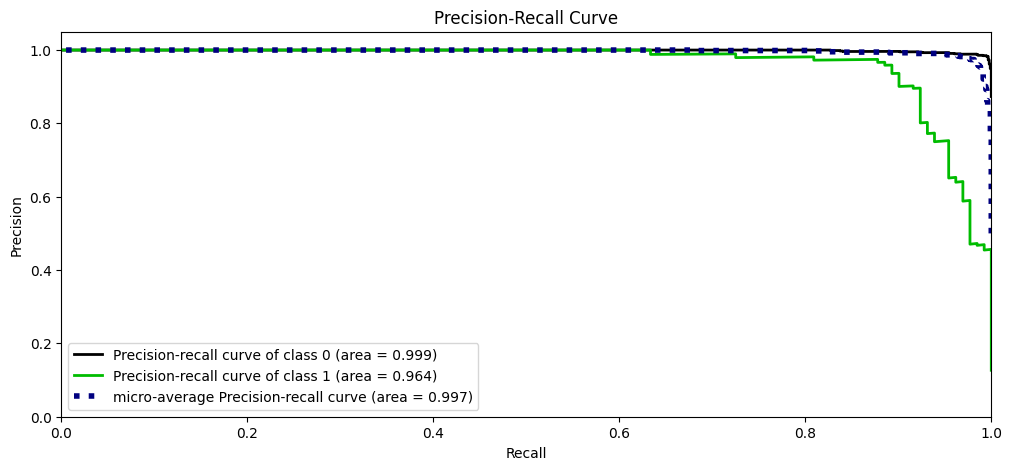

In [58]:
from scikitplot.metrics import plot_roc, plot_precision_recall

pipeline_log_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),                                                      # 1.step: CountVectorizer
    ('classifier', LogisticRegression(C = 0.1, class_weight='balanced', max_iter=1000))            # 2.step: Logistic Regression
])

pipeline_log_count.fit(X_train, y_train)

y_pred_proba = pipeline_log_count.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [59]:
y_pred = pipeline_log_count.predict(X_test)
y_pred_proba= pipeline_log_count.predict_proba(X_test)[:,1]

log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)
log_count_AP = average_precision_score(y_test, y_pred_proba)

#### Tf-Idf vectorizer

In [60]:
pipeline_log_tf_idf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),                                                   # 1.step : Tf-Idf Vectorizer
    ('classifier', LogisticRegression(C = 10, class_weight='balanced', max_iter=1000))    # 2.step : Logistic Regression
])

In [61]:
pipeline_log_tf_idf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=3)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=1000))])

In [62]:
eval(pipeline_log_tf_idf, X_train, X_test)

[[894   9]
 [  6 125]]
Test_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.93      0.95      0.94       131

    accuracy                           0.99      1034
   macro avg       0.96      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3613
           1       0.96      0.99      0.98       522

    accuracy                           0.99      4135
   macro avg       0.98      0.99      0.99      4135
weighted avg       0.99      0.99      0.99      4135



In [63]:
scores = cross_validate(pipeline_log_tf_idf, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.910745
train_precision,0.968097
test_recall,0.890784
train_recall,0.994253
test_f1,0.900162
train_f1,0.980996
test_accuracy,0.975086
train_accuracy,0.995136


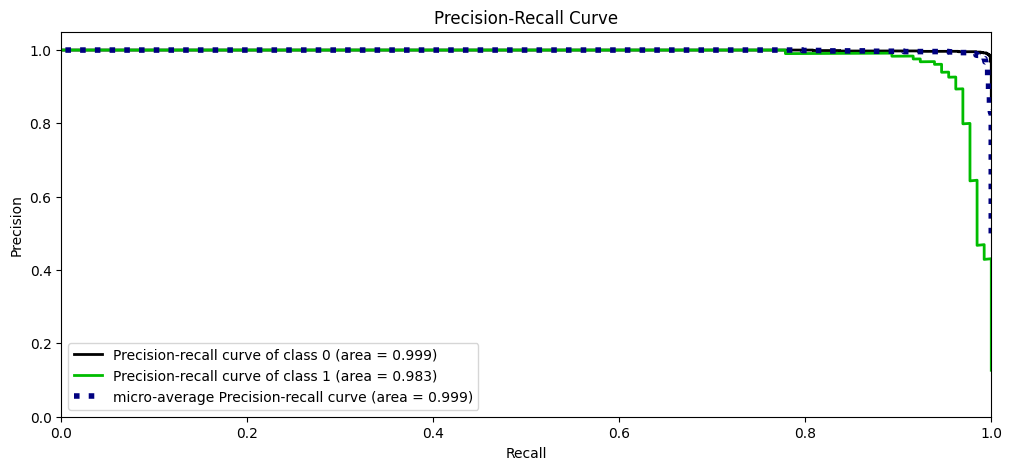

In [64]:
from scikitplot.metrics import plot_roc, plot_precision_recall


pipeline_log_tf_idf = Pipeline([
    ('vectorizer', TfidfVectorizer(min_df=3)),                                              # 1.step : TfidfVectorizer
    ('classifier', LogisticRegression(C = 10, class_weight='balanced', max_iter=1000))    # 2.step : Logistic Regression
])

pipeline_log_tf_idf.fit(X_train, y_train)

y_pred_proba = pipeline_log_tf_idf.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [65]:
y_pred = pipeline_log_tf_idf.predict(X_test)
y_pred_proba = pipeline_log_tf_idf.predict_proba(X_test)[:, 1]

log_tf_idf_AP = average_precision_score(y_test, y_pred_proba)
log_tf_idf_f1 = f1_score(y_test, y_pred)
log_tf_idf_rec = recall_score(y_test, y_pred)

### Pipeline for Naive Bayes

#### Countvectorizer

In [66]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [67]:
pipeline_nb_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),  # 1.step : CountVectorizer
    ('classifier', BernoulliNB())               # 2.step : Bernoulli Naive Bayes
])

In [68]:
pipeline_nb_count.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=3)),
                ('classifier', BernoulliNB())])

In [69]:
eval(pipeline_nb_count, X_train, X_test)

[[900   3]
 [ 16 115]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.88      0.92       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3613
           1       0.98      0.90      0.94       522

    accuracy                           0.98      4135
   macro avg       0.98      0.95      0.96      4135
weighted avg       0.98      0.98      0.98      4135



In [70]:
scores = cross_validate(pipeline_nb_count, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.974557
train_precision,0.980183
test_recall,0.858200
train_recall,0.893358
test_f1,0.912017
train_f1,0.934731
test_accuracy,0.979201
train_accuracy,0.984254


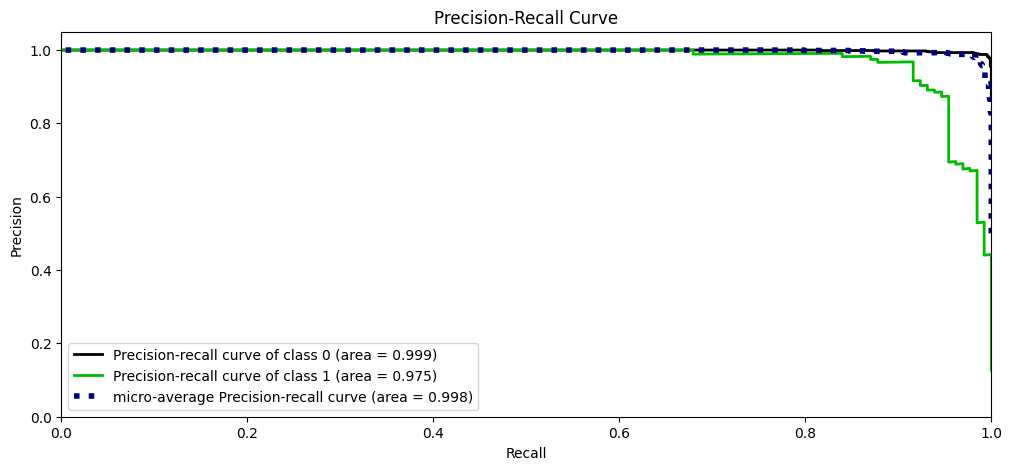

In [71]:
from scikitplot.metrics import plot_roc, plot_precision_recall

pipeline_nb_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),  # 1.step : CountVectorizer
    ('classifier', BernoulliNB())               # 2.step : Bernoulli Naive Bayes
])

pipeline_nb_count.fit(X_train, y_train)

y_pred_proba = pipeline_nb_count.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [72]:
y_pred = pipeline_nb_count.predict(X_test)
y_pred_proba = pipeline_nb_count.predict_proba(X_test)[:,1]

nb_count_AP = average_precision_score(y_test, y_pred_proba)
nb_count_f1 = f1_score(y_test, y_pred)
nb_count_rec = recall_score(y_test, y_pred)

#### Tf-Idf vectorizer

In [73]:
pipeline_nb_tf_idf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),       # 1.step : TfidfVectorizer
    ('classifier', BernoulliNB())               # 2.step : Bernoulli Naive Bayes
])

In [74]:
pipeline_nb_tf_idf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=3)),
                ('classifier', BernoulliNB())])

In [75]:
eval(pipeline_nb_tf_idf, X_train, X_test)

[[900   3]
 [ 16 115]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.88      0.92       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3613
           1       0.98      0.90      0.94       522

    accuracy                           0.98      4135
   macro avg       0.98      0.95      0.96      4135
weighted avg       0.98      0.98      0.98      4135



In [76]:
scores = cross_validate(pipeline_nb_tf_idf, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.974557
train_precision,0.980183
test_recall,0.858200
train_recall,0.893358
test_f1,0.912017
train_f1,0.934731
test_accuracy,0.979201
train_accuracy,0.984254


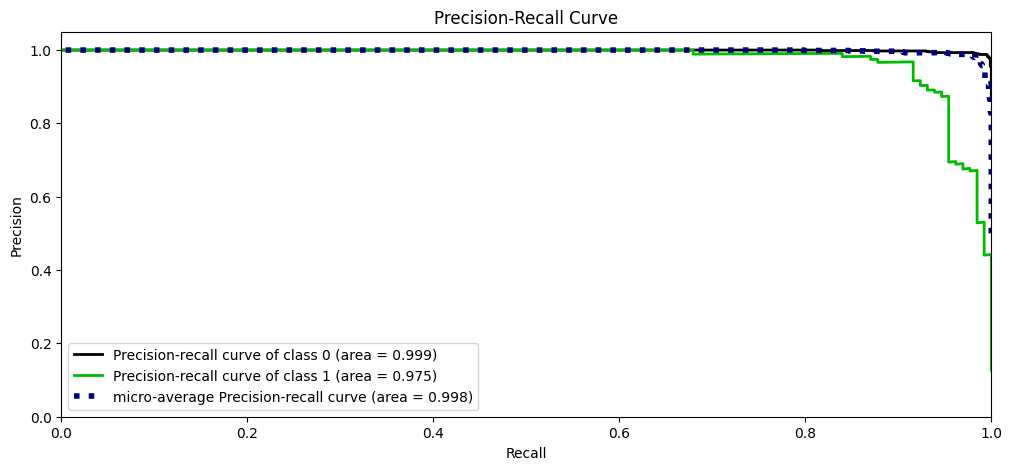

In [77]:
from scikitplot.metrics import plot_roc, plot_precision_recall

pipeline_nb_tf_idf = Pipeline([
    ('vectorizer', TfidfVectorizer(min_df=3)),  # 1.step : TfidfVectorizer
    ('classifier', BernoulliNB())               # 2.step : Bernoulli Naive Bayes
])

pipeline_nb_tf_idf.fit(X_train, y_train)

y_pred_proba = pipeline_nb_tf_idf.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [78]:
y_pred = pipeline_nb_tf_idf.predict(X_test)
y_pred_proba = pipeline_nb_tf_idf.predict_proba(X_test)[:,1]

nb_tf_idf_AP = average_precision_score(y_test, y_pred_proba)
nb_tf_idf_f1 = f1_score(y_test, y_pred)
nb_tf_idf_rec = recall_score(y_test, y_pred)

### Pipeline for XGB

#### Countvectorizer

In [79]:
!pip install -q xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00


In [80]:
from xgboost import XGBClassifier
pipeline_xgb_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),                                        # 1.step : CountVectorizer
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))     # 2.step : XGBoost Classifier
])

In [81]:
pipeline_xgb_count.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=3)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [82]:
eval(pipeline_xgb_count, X_train, X_test)

[[894   9]
 [ 25 106]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.92      0.81      0.86       131

    accuracy                           0.97      1034
   macro avg       0.95      0.90      0.92      1034
weighted avg       0.97      0.97      0.97      1034

Train_Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3613
           1       0.99      0.88      0.94       522

    accuracy                           0.98      4135
   macro avg       0.99      0.94      0.96      4135
weighted avg       0.98      0.98      0.98      4135



In [83]:
scores = cross_validate(pipeline_xgb_count, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.954043
train_precision,0.994252
test_recall,0.827467
train_recall,0.882502
test_f1,0.885881
train_f1,0.935041
test_accuracy,0.973152
train_accuracy,0.984522


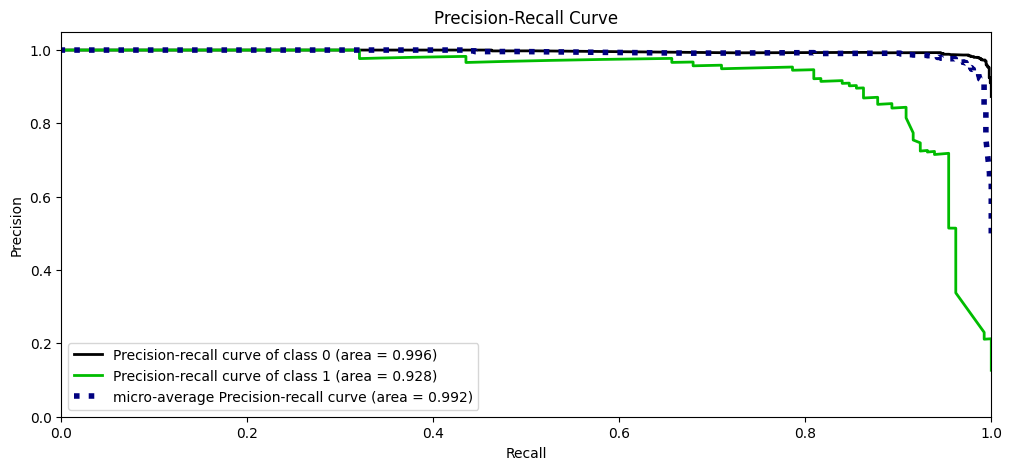

In [84]:
from scikitplot.metrics import plot_roc, plot_precision_recall

pipeline_xgb_count = Pipeline([
    ('vectorizer', CountVectorizer(min_df=3)),                                               # 1.step : CountVectorizer
    ('classifier',  XGBClassifier(use_label_encoder=False, eval_metric='logloss'))           # 2.step : XGBClassifier
])

pipeline_xgb_count.fit(X_train, y_train)

y_pred_proba = pipeline_xgb_count.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [85]:
y_pred = pipeline_xgb_count.predict(X_test)
y_pred_proba = pipeline_xgb_count.predict_proba(X_test)[:,1]

xgb_count_AP = average_precision_score(y_test, y_pred_proba)
xgb_count_f1 = f1_score(y_test, y_pred)
xgb_count_rec = recall_score(y_test, y_pred)

#### Tf-Idf vectorizer

In [86]:
pipeline_xgb_tf_idf = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),                                              # 1.step : TfidfVectorizer
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))      # 2.step : XGBoost Classifier
])

In [87]:
pipeline_xgb_tf_idf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=3)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [88]:
eval(pipeline_xgb_tf_idf, X_train, X_test)

[[894   9]
 [ 26 105]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.92      0.80      0.86       131

    accuracy                           0.97      1034
   macro avg       0.95      0.90      0.92      1034
weighted avg       0.97      0.97      0.97      1034

Train_Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3613
           1       1.00      0.91      0.95       522

    accuracy                           0.99      4135
   macro avg       0.99      0.96      0.97      4135
weighted avg       0.99      0.99      0.99      4135



In [89]:
scores = cross_validate(pipeline_xgb_tf_idf, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.931990
train_precision,0.996057
test_recall,0.806495
train_recall,0.914431
test_f1,0.864115
train_f1,0.953493
test_accuracy,0.968073
train_accuracy,0.988741


In [90]:
y_pred = pipeline_xgb_tf_idf.predict(X_test)
y_pred_proba = pipeline_xgb_tf_idf.predict_proba(X_test)[:,1]

xgb_tf_idf_AP = average_precision_score(y_test, y_pred_proba)
xgb_tf_idf_f1 = f1_score(y_test, y_pred)
xgb_tf_idf_rec = recall_score(y_test, y_pred)

## DL Modeling

In [91]:
# convert label to a numerical variable
df['label'] = df["label"].map({'ham':0, 'spam':1})

In [92]:
X = df["message"].values
y = df["label"].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Tokenization

In [94]:
num_words = 8406  # we use all unique tokens in this project

tokenizer = Tokenizer(num_words=num_words)  #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

# The tokenizer function splits all text into word tokens.
# The num_words hyperparameter indicates that when converting the tokens to numeric version, the first 8405 words (tokens) that occur in the train data/corpus
# will be converted to numeric version and the other tokens will be ignored.

# filters hyper_parameter allows us to set the cleaning operations to be performed.
# If we also want to clean numbers, we can include numbers in the filters hyper_parameter.

In [95]:
tokenizer.fit_on_texts(X_train)

# fit_on_texts first breaks down the texts in the train data/corpus into tokens and then identifies all unique tokens and numbers them according to their frequency of use.
# The most frequently used token is given the number 1.
# Since we have defined num_words= 8406, tokens with numbers between 1 and 8405 will be used in the conversion phase and the others will be ignored.
# To see the ranking of the frequency of use of these tokens, we will need to use the word_index function as below.

### Creating word index

In [96]:
tokenizer.word_index

# word_index sorts the tokens in the train data/corpus according to their frequency of use.

{'i': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'on': 18,
 'that': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 'get': 29,
 'be': 30,
 "i'm": 31,
 'do': 32,
 'will': 33,
 'if': 34,
 'just': 35,
 'we': 36,
 'with': 37,
 'no': 38,
 'ur': 39,
 'this': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 'go': 44,
 'how': 45,
 '4': 46,
 'when': 47,
 'from': 48,
 'out': 49,
 'what': 50,
 'know': 51,
 'ok': 52,
 'free': 53,
 'then': 54,
 'all': 55,
 'got': 56,
 'like': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'come': 61,
 'its': 62,
 'was': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'one': 71,
 'send': 72,
 'going': 73,
 'lor': 74,
 'as': 75,
 'back': 76,
 'by': 77,
 'need': 78,
 'home': 79,
 'see': 80,
 'txt': 81,
 'about': 82,
 'still': 83,
 'r': 84,
 'da'

In [97]:
len(tokenizer.word_index)

# There are a total of 8405 unique tokens in our train data/corpus.

8405

### Converting tokens to numeric

In [98]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)  # Converted to numeric version according to unique tokens in X_train
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)    # converted to numeric version according to unique tokens in X_train to avoid data leakage

# texts_to_sequences function to find all tokens in each document/line of our data and their frequency of use in word_index of train data
# (num_words=8406 so only the first 8405 most frequently used tokens will be used).

# Example: "hello i hope you are doing well and having a great day" comment is converted to the following vector
# --> hello: 254, i: 1, hope: 16, you: 2, are: 21, doing: 153, well: 120, and: 7, having: 295, a: 4, great: 127, day: 65  -->  [254, 1, 16, 2, 21, 153, 120, 7, 295, 4, 127, 65]
# Note that these conversions are based on the top 8405 most frequent tokens in the corpus.

# If we were using the first 4000 tokens for example and if the "great" token was the 4001st or higher token,
# then the "great" token would be ignored during the transformation and
# the resulting vector would be [254, 1, 16, 2, 21, 153, 120, 7, 295, 4, 65]

In [99]:
len(X_train_num_tokens)

4652

In [100]:
X_test[:2]

array(['Eh sorry leh... I din c ur msg. Not sad already lar. Me watching tv now. U still in office?',
       'Ranjith cal drpd Deeraj and deepak 5min hold'], dtype=object)

In [101]:
np.array(X_test_num_tokens[:2], dtype="object")
# we see the numeric vectors of the first two messages.

array([list([852, 96, 392, 1, 1512, 136, 39, 128, 25, 722, 135, 309, 10, 360, 398, 22, 6, 83, 8, 484]),
       list([1505, 7, 849])], dtype=object)

### Maximum number of tokens for all documents

In [102]:
len(X_train_num_tokens[0])

# The 1st message in the train data consists of 33 tokens.

33

In [103]:
len(X_train_num_tokens[1])

# The 2nd messaget in the train data consists of 11 tokens.

11

In [104]:
len(X_train_num_tokens[2])

# ML/DL models require all the data given to them to be of the same size.
# But as you can see, all the messages have different sizes.

9

In [105]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

# first we write the size of all messages in the train corpus into a list and assign it to the variable num_tokens.
# We convert the list to an array, as it is practical to apply aggregation functions to arrays.

In [106]:
num_tokens

array([33, 11,  9, ...,  6, 17, 16])

In [107]:
num_tokens.max()

189

In [108]:
num_tokens.argmax()

1057

In [109]:
X_train[1057]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [110]:
len(X_train_num_tokens[1057])

# We need to make all messages in our corpus the same size. It is actually recommended to fix all messages to 189,
# the length of the longest message, to avoid any loss of information/token loss in the messages.
# However, this will cost us a lot of work when this number is too high.
# if you have very powerful machines, of course it makes the most sense to pin all messages to the size of the longest message.
# However, if our machines are not powerful, we need to fix smaller sizes. When deciding this,
# we can set the number so that at least 95% or more of the messages in our corpus will not lose information/token (5% or less token/information loss).

189

In [111]:
max_tokens = 189

In [112]:
# sum(num_tokens <= max_tokens) / len(num_tokens)    # 1.0

# We manually control the max_tokens so that the rate is above 95%.

In [113]:
len(num_tokens)

# Number of all documents/rows/messages in my train data

4652

### Fixing token counts of all documents (pad_sequences)

In [114]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre") # padding="pre", padding and trimming are done from the beginning.
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")   # padding="post", padding and clipping are done from the end.

# The pad_sequences function is given the numeric versions of the messages and the length to be padded (maxlen) and all messages are padded to 189 tokens.
# This operation is called padding. However, don't let the name mislead you, this operation is not only padding, but also trimming.

# If we fix the messages to 50 tokens, messages with fewer than 50 tokens are padded with 0s to be added at the beginning of the message.
# For example, a message with 40 tokens is padded with 10 0's at the beginning of the message so that it is fixed to 50 tokens. (if padding="pre")
# Messages with more than 50 tokens will have their tokens trimmed to be from the beginning of the message.
# For example, a message with 60 tokens is trimmed by trimming the first 10 tokens at the beginning of the message(if padding="pre").
# No addition or trimming is done to a message consisting of 50 tokens. It is left as it is.

In [115]:
display(X_train_pad.shape)
display(X_test_pad.shape)

# we see that all messages are pinned to 189 tokens.

(4652, 189)

(517, 189)

In [116]:
np.array(X_test_num_tokens[100])

array([  58,  461, 1556,   45,  447,    2,   65,  100,  869,   61,   13,
        140,    1,   95,   15,    2, 6051,    7,   72,   11,   67, 1064,
          5,  860,    3,  132,    2,  346,    7,  139])

In [117]:
len(np.array(X_test_num_tokens[100]))
# we see that the 100th message in the test data consists of 30 tokens.

30

In [118]:
X_test_pad[100]

# After padding, 159 0's are added to the beginning of the message to be fixed to 189 tokens.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [119]:
np.array(X_train_num_tokens[1057])

# now let's see what happens if we apply padding to the longest document/message in the train data/corpus consisting of 189 tokens.

array([  12,   10,    5,   67,  130,  335,   37, 4791,    1,  130,  222,
         19,    1,   78,  105,  184,   60,  212,   10,  111,  130,   30,
          5,  199,  201,  227,  576,    8,   11, 2968,    1,  173,  335,
          5,   65,    7,  307,   14,   37,  105,  111,  130,   30,   68,
        184,   60,    1, 1021,   67,   33,   30,   54,   47,   11,  184,
       2969,  119,  105,  286,   11,  166,  130,  531,  212,  105,   11,
        166,   33,   30, 2970,    3,  105,    1,  173, 1724,   12,  105,
         33,  133,   55,   11,  878,    7,   93,   55,  105, 4792,    1,
         33,   30,  292,    3, 2971,   37,  747,   12,  105,    1,   33,
         30,    8,   67,   47,    1,   33,   30,  153,    5, 4793,  251,
         12,  105,   67,   33,   30,   47,    1,   97,   16,    3, 4794,
        747,   19,   11,  406,    9,    5,  466,  568, 1271,   18,    5,
        734, 2972,    1,   33,  230,   30, 2973, 4795,   12,  105,   67,
         33,   30,   47,    1,  335,   41,  525, 22

In [120]:
X_train_pad[1057]

# No addition or trimming is done

array([  12,   10,    5,   67,  130,  335,   37, 4791,    1,  130,  222,
         19,    1,   78,  105,  184,   60,  212,   10,  111,  130,   30,
          5,  199,  201,  227,  576,    8,   11, 2968,    1,  173,  335,
          5,   65,    7,  307,   14,   37,  105,  111,  130,   30,   68,
        184,   60,    1, 1021,   67,   33,   30,   54,   47,   11,  184,
       2969,  119,  105,  286,   11,  166,  130,  531,  212,  105,   11,
        166,   33,   30, 2970,    3,  105,    1,  173, 1724,   12,  105,
         33,  133,   55,   11,  878,    7,   93,   55,  105, 4792,    1,
         33,   30,  292,    3, 2971,   37,  747,   12,  105,    1,   33,
         30,    8,   67,   47,    1,   33,   30,  153,    5, 4793,  251,
         12,  105,   67,   33,   30,   47,    1,   97,   16,    3, 4794,
        747,   19,   11,  406,    9,    5,  466,  568, 1271,   18,    5,
        734, 2972,    1,   33,  230,   30, 2973, 4795,   12,  105,   67,
         33,   30,   47,    1,  335,   41,  525, 22

### Modeling

In [121]:
model = Sequential()

In [122]:
embedding_size = 50

# Here we specify how many elements/dimensional vector we want each token to be given to the DL model.

In [123]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size
                    ))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

# return_sequences=False transfers only the hidden_state from the last time step (t_n) of the model to the next layer. default is False.
# return_sequences= True transfers hidden_states from all time steps of the model (such as t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# This way the model tries to remember the whole sentence. If an LSTM/GRU layer is followed by another LSTM/GRU layer,  return_sequences=True or the model will return an error.
# However, if the next layer is a dense layer, return_sequences=False must be set otherwise the model will return an error. Because Dense layers work with only one hidden_state.

In [124]:
# The rate set during the dropout process refers to how many neurons will be turned off on average.
# For example, during dropout(0.5), 50% of the neurons are randomly turned off in each iteration, but this rate may not be exactly the same in each iteration.
# For example, it might be 0.3 in one iteration and 0.7 in another, but the average is always 0.5.
# So the ratio can change in each iteration, as you can imagine.

In [125]:
optimizer = AdamW(learning_rate=0.05) #AdamW

In [126]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [127]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 1,
                           restore_best_weights=True,
                           verbose=1)

In [128]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train) #class_weight={0:1, 1:10}
pd.Series(class_weights).unique()

array([3.95578231, 0.57234252])

In [129]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=128,
          sample_weight=class_weights,
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10
37/37 [==============================] - 16s 298ms/step - loss: 0.2677 - recall: 0.8929 - val_loss: 0.0802 - val_recall: 0.9692
Epoch 2/10
37/37 [==============================] - 10s 269ms/step - loss: 0.0633 - recall: 0.9762 - val_loss: 0.0622 - val_recall: 0.9692
Epoch 2: early stopping


In [130]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          420300    
                                                                 
 dropout (Dropout)           (None, None, 50)          0         
                                                                 
 gru (GRU)                   (None, None, 50)          15300     
                                                                 
 dropout_1 (Dropout)         (None, None, 50)          0         
                                                                 
 gru_1 (GRU)                 (None, None, 25)          5775      
                                                                 
 dropout_2 (Dropout)         (None, None, 25)          0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

### Model evaluation

In [131]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.267681,0.892857,0.080200,0.969231
1,0.063266,0.976190,0.062223,0.969231


<Axes: >

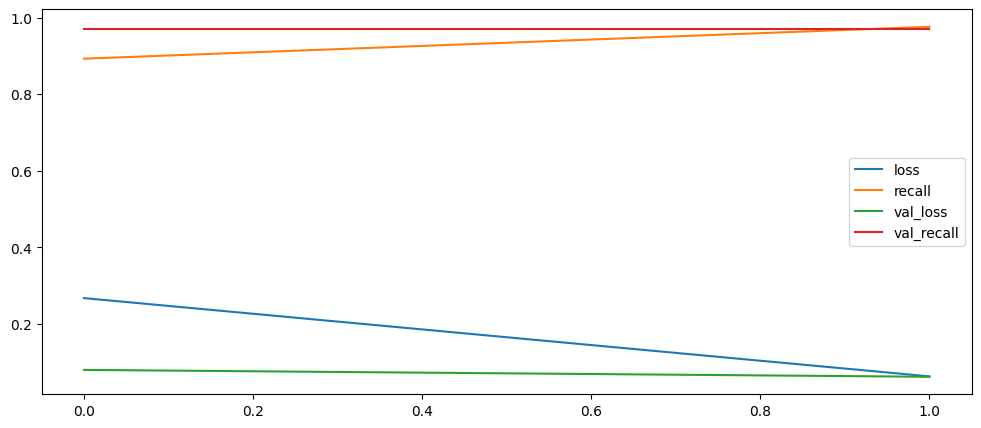

In [132]:
model_loss.plot()

In [133]:
model.evaluate(X_test_pad, y_test)

17/17 [==============================] - 1s 45ms/step - loss: 0.0802 - recall: 0.9692


[0.08020045608282089, 0.9692307710647583]

In [134]:
model.evaluate(X_train_pad, y_train)

146/146 [==============================] - 6s 40ms/step - loss: 0.0654 - recall: 0.9847


[0.06542538106441498, 0.9846938848495483]

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

17/17 [==============================] - 2s 39ms/step
[[444   8]
 [  2  63]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       452
           1       0.89      0.97      0.93        65

    accuracy                           0.98       517
   macro avg       0.94      0.98      0.96       517
weighted avg       0.98      0.98      0.98       517



In [136]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

146/146 [==============================] - 6s 42ms/step
[[4000   64]
 [   9  579]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4064
           1       0.90      0.98      0.94       588

    accuracy                           0.98      4652
   macro avg       0.95      0.98      0.97      4652
weighted avg       0.99      0.98      0.98      4652



17/17 [==============================] - 1s 42ms/step


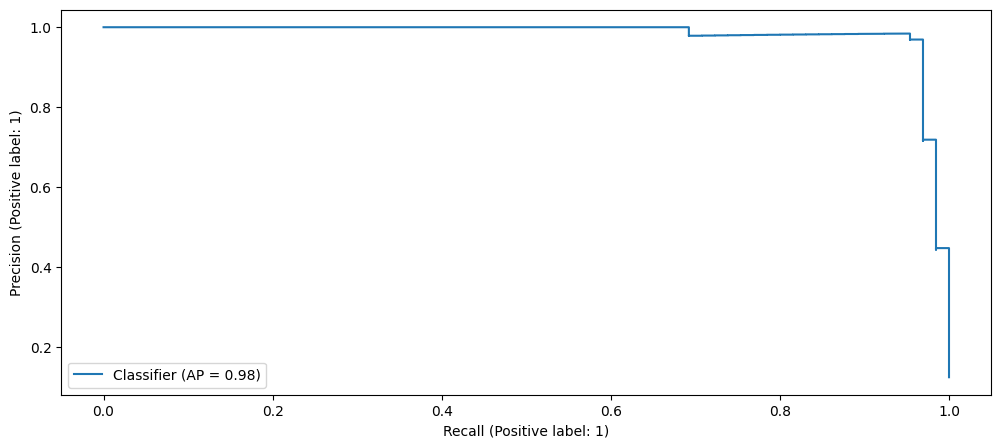

In [137]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [138]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9819235245719318

In [139]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [1]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  #TPUClusterResolver is used to find the cluster where TPUs are located.
  print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
# This line of code connects TensorFlow to the TPU cluster specified by the tpu object created earlier.
tf.tpu.experimental.initialize_tpu_system(tpu)
#This step initializes the TPU system and makes it ready for use.
tpu_strategy = tf.distribute.TPUStrategy(tpu)
#Accelerates training by distributing the model across multiple TPU cores.

Tensorflow version 2.15.0
Running on a TPU w/8 cores


### Train test split

In [140]:
X = df["message"].values
y = df["label"].values

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Transformation Matrix to Tensorflow Tensor

In [142]:
# For every sentence...
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")

number_tokens_sentences = []
for sent in X_train:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(str(sent),
                                 add_special_tokens=True)

    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# We will only use tokenizer.encode() to find out how many tokens the longest comment consists of
# and to decide how many tokens to encode all comments/text into.

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

Max sentence length:  293


In [143]:
train_text=[]
for i, j in zip(X_train, y_train):
  train_text.append({"text": str(i), "label":j})

test_text=[]
for i, j in zip(X_test, y_test):
  test_text.append({"text": str(i), "label":j})

In [144]:
train_text[0:2]

[{'text': 'SMS AUCTION You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+',
  'label': 1},
 {'text': 'So check your errors and if you had difficulties, do correction.',
  'label': 0}]

In [145]:
from datasets import Dataset
train_dataset = Dataset.from_list(train_text)
test_dataset = Dataset.from_list(test_text)

In [146]:
train_dataset[:2]

{'text': ['SMS AUCTION You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+',
  'So check your errors and if you had difficulties, do correction.'],
 'label': [1, 0]}

In [147]:
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 4652
})

###Fixing token counts of all documents

In [148]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")
def transformation(examples):
  seq=293
  tokenized_data = tokenizer(text=examples["text"],
                             return_tensors="np",
                             padding="max_length",
                             truncation=True,
                             max_length=seq,
                             add_special_tokens=True)
  return tokenized_data

train_tokenized_data = train_dataset.map(transformation, batched=True)
test_tokenized_data = test_dataset.map(transformation, batched=True)

Map:   0%|          | 0/4652 [00:00<?, ? examples/s]

Map:   0%|          | 0/517 [00:00<?, ? examples/s]

In [149]:
train_tokenized_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4652
})

In [150]:
test_tokenized_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 517
})

### Create Optimizer

In [151]:
len(train_tokenized_data["input_ids"])//32   # number of iterations in an epoch

145

In [152]:
from transformers import create_optimizer

batch_size = 32 # 16
num_train_epochs = 2 # 2, 3, 4
num_train_steps = (len(train_tokenized_data["input_ids"]) // batch_size) * num_train_epochs    # In BERT model we create the optimizer ourselves
optimizer, lr_schedule = create_optimizer(
                                          init_lr=2e-5, #3e-5, 5e-5
                                          num_train_steps=num_train_steps,
                                          weight_decay_rate=0.01,
                                          num_warmup_steps=0.1)   # learning rate starts at 0 and gradually increases to 2e-5 until it reaches 10% of the total number of steps
                                                                  # The reason we do this is to prevent overfitting

###Creating Model with TPU

In [153]:
with tpu_strategy.scope():

    from transformers import TFAutoModelForSequenceClassification

    #from tensorflow.keras.optimizers import AdamW
    #from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy

    # Load and compile our model
    model = TFAutoModelForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-uncased",
                                                                 num_labels=2)
    #loss=CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.ReductionV2.NONE
    # loss= SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.ReductionV2.NONE)


    model.compile(optimizer=optimizer, metrics=["accuracy"])  # No loss argument!

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Transformation Dataset to TF_dataset Format

In [154]:
tf_dataset_train = model.prepare_tf_dataset(train_tokenized_data, batch_size=32, shuffle=False)   # we convert datasets to tensorflow tensors
tf_dataset_test = model.prepare_tf_dataset(test_tokenized_data, batch_size=32, shuffle=False)

In [155]:
tf_dataset_train

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [156]:
tf_dataset_test

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 293), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

###Model Fiting

In [157]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weight_dict = dict(enumerate(class_weights))

In [158]:
model.fit(tf_dataset_train,
          validation_data=(tf_dataset_test),
          epochs=num_train_epochs,
          class_weight=class_weight_dict
         )

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
146/146 [==============================] - 216s 614ms/step - loss: 0.1684 - accuracy: 0.9443 - val_loss: 0.0457 - val_accuracy: 0.9865
Epoch 2/2
146/146 [==============================] - 21s 141ms/step - loss: 0.0411 - accuracy: 0.9895 - val_loss: 0.0489 - val_accuracy: 0.9845


In [159]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 110618882 (421.98 MB)
Trainable params: 110618882 (421.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model evaluation

In [160]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.168450,0.944325,0.045729,0.986460
1,0.041115,0.989467,0.048942,0.984526


<Axes: >

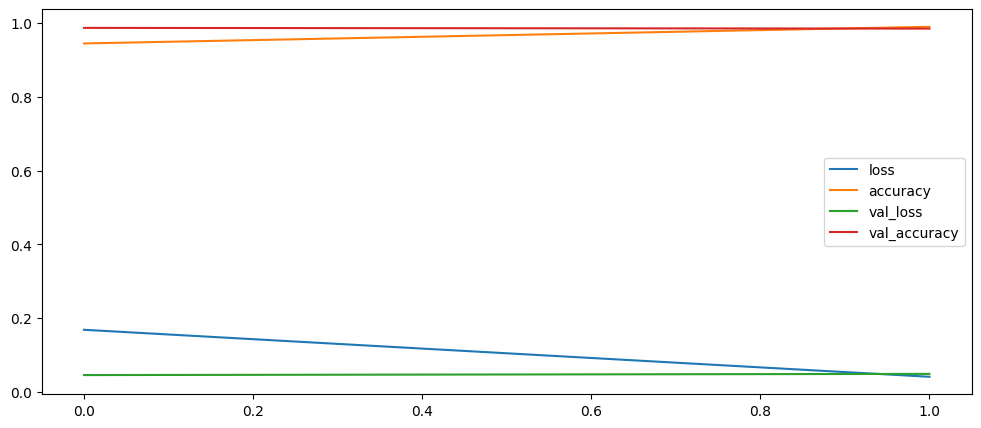

In [161]:
model_loss.plot()

In [162]:
logits= model.predict(tf_dataset_test)
logits

17/17 [==============================] - 25s 457ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[ 2.3752575, -3.010509 ],
       [ 1.8751528, -2.645352 ],
       [ 2.3768394, -3.0385988],
       ...,
       [ 2.448059 , -3.0088139],
       [ 2.1812975, -2.9305737],
       [ 2.1118834, -2.7947524]], dtype=float32), hidden_states=None, attentions=None)

In [163]:
logits.logits

array([[ 2.3752575, -3.010509 ],
       [ 1.8751528, -2.645352 ],
       [ 2.3768394, -3.0385988],
       ...,
       [ 2.448059 , -3.0088139],
       [ 2.1812975, -2.9305737],
       [ 2.1118834, -2.7947524]], dtype=float32)

In [164]:
import tensorflow as tf

probabilities = tf.nn.softmax(logits.logits, axis=-1).numpy()

probabilities

array([[0.99543965, 0.00456044],
       [0.9892336 , 0.01076635],
       [0.9955723 , 0.0044277 ],
       ...,
       [0.99575126, 0.00424875],
       [0.9940112 , 0.00598872],
       [0.992657  , 0.00734301]], dtype=float32)

In [165]:
y_pred=np.argmax(probabilities, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [166]:
def classification(tokenized_data):
  import tensorflow as tf
  import numpy as np

  logits= model.predict(tokenized_data)
  probabilities = tf.nn.softmax(logits.logits, axis=-1).numpy()
  y_pred = np.argmax(probabilities, axis=1)
  return y_pred

In [167]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=classification(tf_dataset_test)
print(classification_report(y_test, y_pred))

17/17 [==============================] - 2s 36ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       452
           1       0.93      0.95      0.94        65

    accuracy                           0.98       517
   macro avg       0.96      0.97      0.97       517
weighted avg       0.98      0.98      0.98       517



In [168]:
y_train_pred=classification(tf_dataset_train)
print(classification_report(y_train, y_train_pred))

146/146 [==============================] - 6s 36ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4064
           1       0.96      0.99      0.98       588

    accuracy                           0.99      4652
   macro avg       0.98      0.99      0.99      4652
weighted avg       0.99      0.99      0.99      4652



17/17 [==============================] - 3s 37ms/step


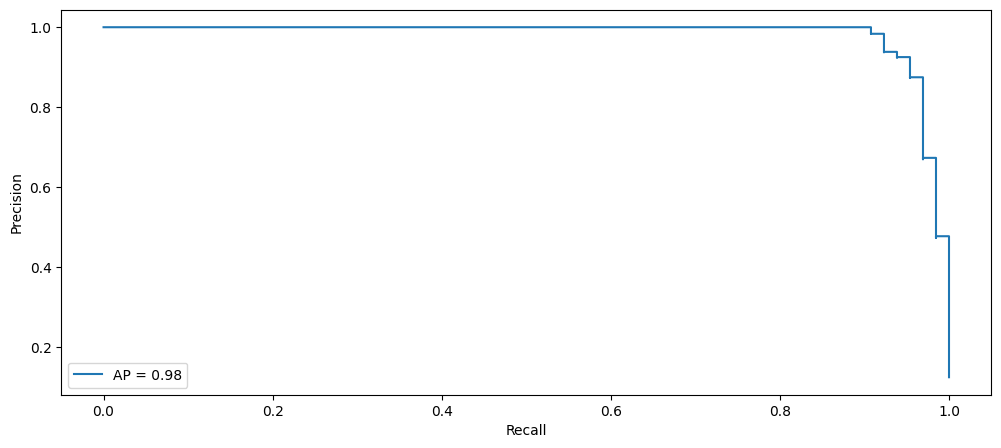

In [169]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

def classification_probabilities(tokenized_data):
    logits = model.predict(tokenized_data)
    probabilities = tf.nn.sigmoid(logits.logits).numpy()
    return probabilities

def classification_probabilities(tokenized_data):
    logits = model.predict(tokenized_data)
    probabilities = tf.nn.sigmoid(logits.logits).numpy()
    return probabilities

# Test seti için olasılıkları al
y_test_prob = classification_probabilities(tf_dataset_test)

# y_test_prob 2D olduğundan, sadece pozitif sınıfın olasılığını alıyoruz
y_test_prob = y_test_prob[:, 1]  # 1. sınıfın (pozitif) olasılıklarını seçiyoruz

# Precision-Recall eğrisi ve AP skorunu hesapla
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
ap_score = average_precision_score(y_test, y_test_prob)

# Eğriyi çiz
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap_score)
disp.plot()

In [170]:
BERT_AP = average_precision_score(y_test, y_test_prob)
BERT_f1 = f1_score(y_test, y_pred)
BERT_rec = recall_score(y_test, y_pred)

## Pre-Trained Model from Huggingface

Find a pre-trained model trained on ham-spam data from the huggingface website and apply it to your own data.

Below is an example model you can use.

https://huggingface.co/mshenoda/roberta-spam

0: ham
1: spam

### Train-Test Split

In [171]:
X = df["message"].values
y = df["label"].values

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In [1]:
# create pipeline
pipeline_hf = pipeline("text-classification", model="mshenoda/roberta-spam")

NameError: name 'pipeline' is not defined

In [77]:
# Modelin döndürdüğü etiketleri 0 ve 1'e eşlemek için bir sözlük oluşturun
label_map = {"LABEL_0": 0, "LABEL_1": 1}

# Test verileri üzerinde tahminler yapın ve etiketleri dönüştürün
y_pred = [label_map[pipeline_hf(text)[0]['label']] for text in X_test]

In [78]:
HF_recall = recall_score(y_test, y_pred)
HF_f1 = f1_score(y_test, y_pred)
HF_AP = average_precision_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "XGB_count",
                                  "NaiveBayes_tfidf", "LogReg_tfidf", "XGB_tfidf",
                                  "DL", "BERT", "HF"],

                        "F1_Score": [nb_count_f1, log_count_f1, xgb_count_f1,
                                     nb_tf_idf_f1, log_tf_idf_f1, xgb_tf_idf_f1,
                                     DL_f1, BERT_f1, HF_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, xgb_count_rec,
                                         nb_tf_idf_rec, log_tf_idf_rec, xgb_tf_idf_rec,
                                         DL_rec, BERT_rec, HF_rec],

                        "Average_Precision_Score": [nb_count_AP, log_count_AP, xgb_count_AP,
                                                    nb_tf_idf_AP, log_tf_idf_AP, xgb_tf_idf_AP,
                                                    DL_AP, BERT_AP, HF_AP]
                        })

compare

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(131)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare)
ax.set_xlabel("Recall Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(132)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare)
ax.set_xlabel("F1 Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(133)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare)
ax.set_xlabel("Average Precision Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___